In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [125]:
#data.loc[(data['Age']>20) & (data['Age']<40)]

In [4]:
data.shape

(5000, 14)

In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
pd.DataFrame(data.columns,index=None,copy=False)

,0
0,ID
1,Age
2,Experience
3,Income
4,ZIP Code
5,Family
6,CCAvg
7,Education
8,Mortgage
9,Personal Loan


In [7]:
pd.DataFrame(data.columns,index=None,copy=True).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [8]:
data.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [9]:
data.tail(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [10]:
# Random 3 observation
data.sample(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2432,2433,54,30,45,92182,4,0.9,2,0,0,0,0,0,1
4714,4715,27,3,81,90291,3,1.5,1,307,0,1,1,1,1
2104,2105,40,14,58,90245,4,0.2,3,0,0,0,0,1,0


# datatypes present in training dataset

In [11]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
data.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [13]:
data.dtypes.to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64


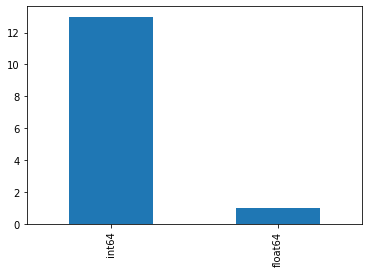

In [14]:
display(data.dtypes.to_frame().T)
data.dtypes.value_counts().plot(kind="bar")
plt.show()

In [15]:
data.isnull().values.any()

False

In [16]:
(data.apply(lambda x: sum(x.isnull()))).to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Ploting the NAN values if any.

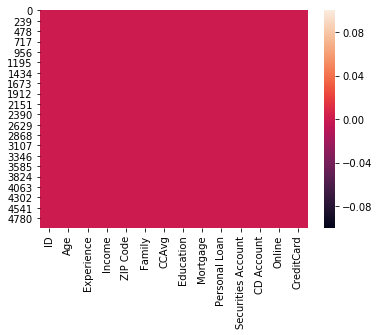

In [17]:
sb.heatmap(data.isna())
plt.show()

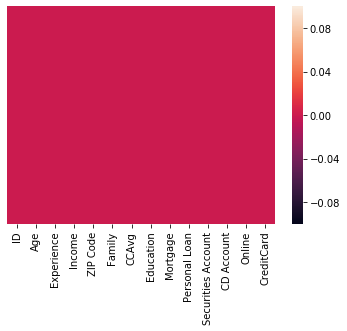

In [18]:
sb.heatmap(data.isna(),yticklabels=False)
plt.show()

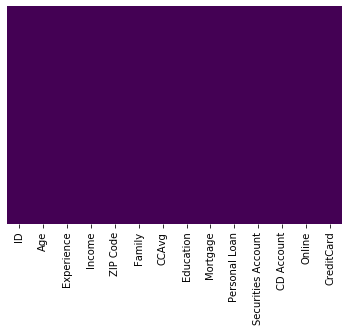

In [19]:
sb.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [40]:
df = pd.read_csv('train.csv')

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.shape

(891, 12)

In [45]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [49]:
df.isna().sum().to_frame().T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,177,0,0,0,0,687,2


,int64,object,float64
0,5,5,2


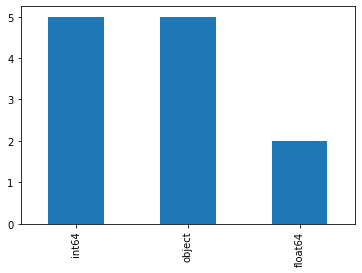

In [57]:
display(df.dtypes.value_counts().to_frame().T)
df.dtypes.value_counts().plot(kind = 'bar')
plt.show()

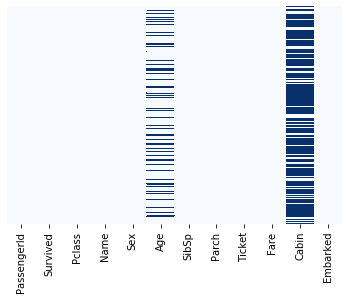

In [70]:
sb.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

In [76]:
display(df.apply(lambda x: len(x.unique())).to_frame().T)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,891,2,3,891,2,89,7,7,681,248,148,4


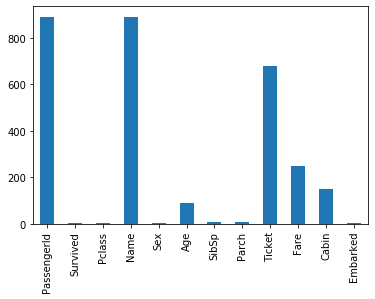

In [79]:
df.apply(lambda x: len(x.unique())).plot(kind = 'bar')

In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Data Distribution of each feature

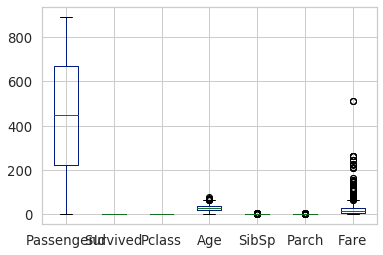

In [124]:
#pd.options.display.mpl_style = 'default'
df.boxplot()
plt.show()

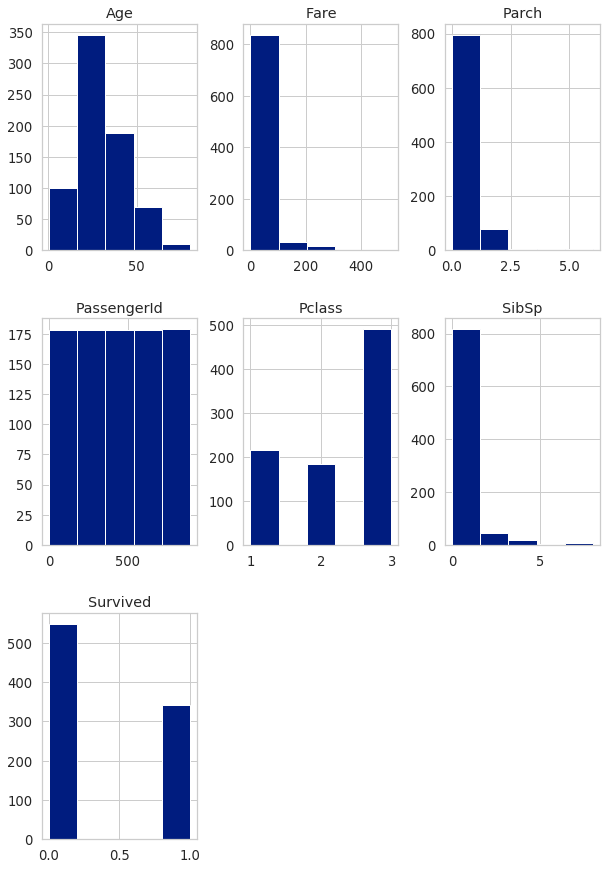

In [114]:
df.hist(bins = 5, figsize = (10, 15))
plt.show()

Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

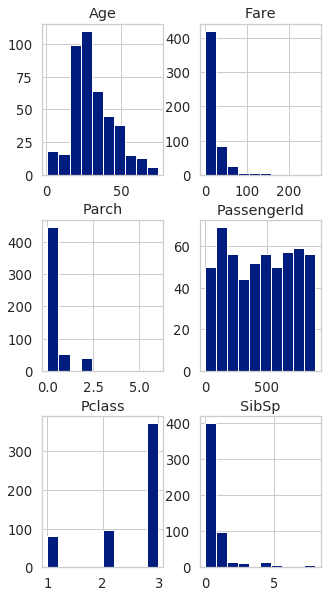

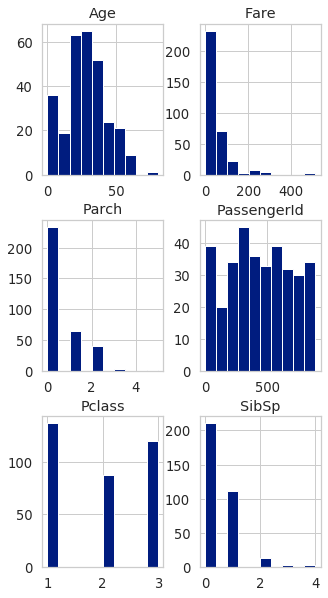

In [119]:
df.groupby('Survived').hist(figsize = (5, 10))

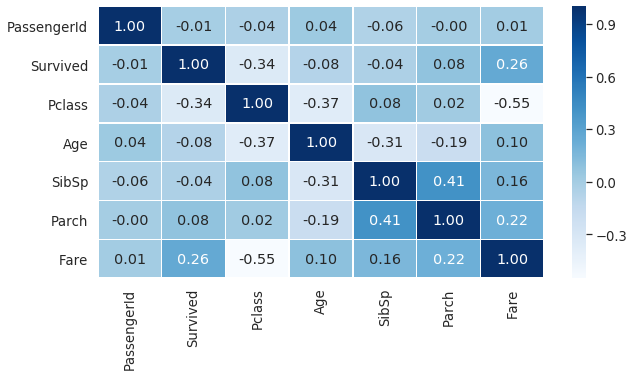

In [131]:
fig, ax = plt.subplots(figsize = (10, 5))
sb.heatmap(df.corr(), annot=True, cmap = "Blues", linewidths=.5, fmt= '.2f', ax = ax)
plt.show()

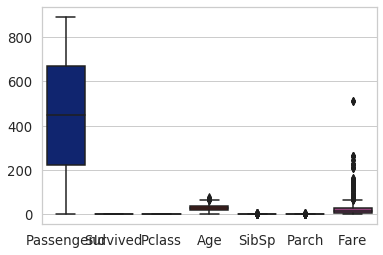

In [132]:
sb.boxplot(data = df)

In [133]:
#Now checking class distribution of pclass, i.e., how many people from each class survived.
#pclass             Ticket class              1 = 1st, 2 = 2nd, 3 = 3rd

In [147]:
df_survived = df[df['Survived'] == 1]
df_not_survived = df[df['Survived'] == 0]

In [166]:
gb_pclass = df_survived.groupby("Pclass").sum()

In [167]:
gb_pclass

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,66881,136,4314.92,67,53,13002.6919
2,38200,87,2149.83,43,56,1918.8459
3,46893,119,1754.92,52,50,1629.6916


In [168]:
gb_pclass_surv = df_survived.groupby("Pclass")["Survived"].sum()

In [169]:
gb_pclass_surv

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [179]:
gb_pclass = df_not_survived.groupby("Pclass").count()

In [180]:
gb_pclass

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,80,80,80,80,64,80,80,80,80,59,80
2,97,97,97,97,90,97,97,97,97,3,97
3,372,372,372,372,270,372,372,372,372,6,372


In [181]:
gb_pclass_notsurv = df_not_survived.groupby("Pclass")["Survived"].count()

In [182]:
gb_pclass_notsurv

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

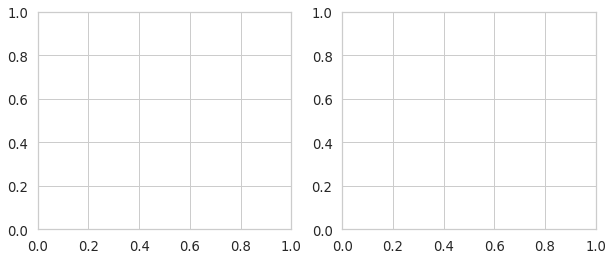

In [191]:
fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1,2,1)
f2 = fig.add_subplot(1,2,2)

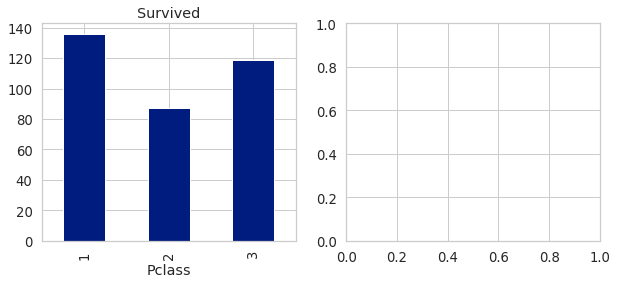

In [192]:
fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1,2,1)
f2 = fig.add_subplot(1,2,2)
gb_pclass_surv.plot(kind = 'bar', title = "Survived", ax = f1)

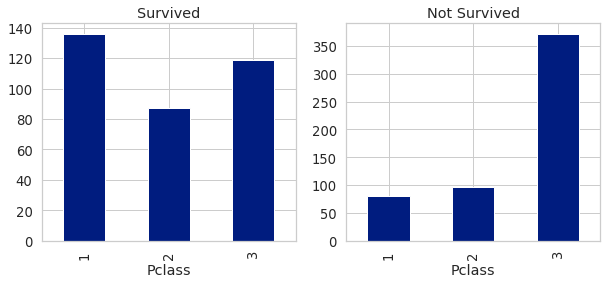

In [194]:
fig = plt.figure(figsize = (10,4))
f1 = fig.add_subplot(1,2,1)
f2 = fig.add_subplot(1,2,2)
gb_pclass_surv.plot(kind = 'bar', title = "Survived", ax = f1)
gb_pclass_notsurv.plot(kind = 'bar', title = "Not Survived", ax = f2)
plt.show()